In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

In [ ]:
reg = linear_model.LinearRegression()
print(reg.fit(X, Y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.5, random_state = 0)

In [ ]:
Y_Pred = reg.predict(X_Test)

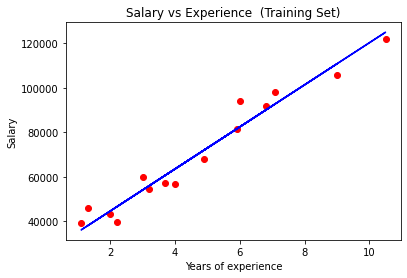

In [ ]:
plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, reg.predict(X_Train), color = 'blue')
plt.title('Salary vs Experience  (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

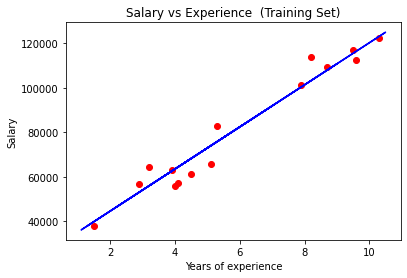

In [ ]:
plt.scatter(X_Test, Y_Test, color = 'red')
plt.plot(X_Train, reg.predict(X_Train), color = 'blue')
plt.title('Salary vs Experience  (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(Y_Test,Y_Pred)
print(r_squared)

0.9550631247518471


In [ ]:
print(reg.coef_)

[9449.96232146]


Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salary')

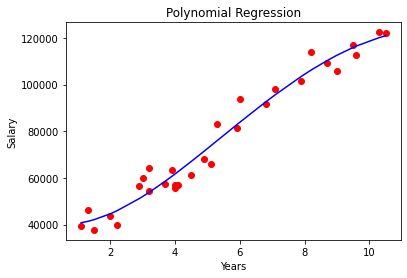

In [ ]:
plt.scatter(X, Y, color='red')
plt.plot(X, pol_reg.predict(poly.fit_transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Years')
plt.ylabel('Salary')

In [ ]:
pol_pred=pol_reg.predict(poly.fit_transform([[5.5]]))
pol_pred

array([78222.70768729])

In [ ]:
x=Y_Pred-pol_pred
x

array([-38255.56400644,  44904.10442237, -13685.66197065, -15575.65443494,
        37344.1345652 ,  29784.16470804,  38289.13079735, -14630.6582028 ,
        -2345.70718491,  22224.19485088, -25025.6167564 ,  -4235.6996492 ,
       -22190.62805996,  -9905.67704207,  25059.18354731])

Lasso Regression


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso
Las_model=Lasso(alpha=0.4)
Las_model.fit(X_poly,Y)
print(Las_model.score(X_poly,Y))
print(Las_model.coef_)

0.9634192890045954
[   0.         2209.97624927 1173.46404099  -10.39554798   -4.63215054]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394826390.59231114, tolerance: 2179497.7852000003
  positive)
